# LOAD DATA AND IMPORT LIBRARY

In [1]:
#Manipulation
import numpy as np
import pandas as pd
import sidetable as stb
import matplotlib

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Warning
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## Dataset

In [2]:
df = pd.read_csv("application_train.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
# drop SK_ID_CURR column
df = df.drop(["SK_ID_CURR"],1)

In [7]:
# Cek Missing Value
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
# drop column with missing values > 50% of rows
for col in df:
    if df[col].isna().sum() > (df.shape[0])/2:
        df = df.drop(col, 1)

In [11]:
# check
df.shape

(307511, 80)

In [12]:
# categorical columns
cats = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE",
          "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START",
          "ORGANIZATION_TYPE", "EMERGENCYSTATE_MODE"]

In [13]:
# stat desc for categorical columns
df[cats].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,159428


In [14]:
# columns with binary variable (0/1)
bins = ["TARGET", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE",
             "FLAG_PHONE", "FLAG_EMAIL","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION",
             "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY",
              "LIVE_CITY_NOT_WORK_CITY","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4",
              "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8",
              "FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12",
               "FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16",
               "FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20",
               "FLAG_DOCUMENT_21"]

In [15]:
# get numerical columns
nums = []
for col in df:
    if col not in cats:
        nums.append(col)

In [16]:
# get numerical columns
nums2 = []
for col in nums:
    if col not in bins:
        nums2.append(col)

In [17]:
# stat desc numerical col
df[nums2].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,...,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,...,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,...,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,...,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,...,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,...,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,...,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Handling Categorical Data

In [19]:
# Missing Value Check in Categorical Column
df[cats].isna().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
EMERGENCYSTATE_MODE           145755
dtype: int64

In [21]:
# handle missing values categorical col using mode
for col in df[cats]:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [23]:
# check
df[cats].isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
EMERGENCYSTATE_MODE           0
dtype: int64

### Handling Numerical Data

In [24]:
df[nums2].isna().sum()

CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
CNT_FAM_MEMBERS                      2
REGION_RATING_CLIENT                 0
REGION_RATING_CLIENT_W_CITY          0
HOUR_APPR_PROCESS_START              0
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
YEARS_BEGINEXPLUATATION_AVG     150007
FLOORSMAX_AVG                   153020
YEARS_BEGINEXPLUATATION_MODE    150007
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_MEDI    150007
FLOORSMAX_MEDI                  153020
TOTALAREA_MODE                  148431
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE 

In [25]:
# handle missing values numerical data using median
for col in df[nums2]:
    df[col].fillna(df[col].median(), inplace=True)

In [26]:
# Check
df[nums2].isna().sum()

CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
HOUR_APPR_PROCESS_START         0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    0
YEARS_BEGINEXPLUATATION_AVG     0
FLOORSMAX_AVG                   0
YEARS_BEGINEXPLUATATION_MODE    0
FLOORSMAX_MODE                  0
YEARS_BEGINEXPLUATATION_MEDI    0
FLOORSMAX_MEDI                  0
TOTALAREA_MODE                  0
OBS_30_CNT_SOCIAL_CIRCLE        0
DEF_30_CNT_SOCIAL_CIRCLE        0
OBS_60_CNT_SOCIAL_CIRCLE        0
DEF_60_CNT_SOCIAL_CIRCLE        0
DAYS_LAST_PHONE_CHANGE          0
AMT_REQ_CREDIT_BUREAU_HOUR      0
AMT_REQ_CREDIT

### Handling Others

In [28]:
# check duplicated values
print(df.duplicated().sum())

0


In [30]:
# handle outlier using z-score
from scipy import stats
print(f'jumlah baris sebelum difilter : {len(df)}')

filtered_entries = np.array([True]*len(df))
for col in nums2:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
df_filtered = df[filtered_entries]

print(f"jumlah baris setelah difilter: {len(df_filtered)}")

jumlah baris sebelum difilter : 307511
jumlah baris setelah difilter: 248189


In [32]:
# check inconsistent data
for col in df_filtered[cats]:
    print(df_filtered[col].value_counts(), '\n')

Cash loans         224071
Revolving loans     24118
Name: NAME_CONTRACT_TYPE, dtype: int64 

F      163893
M       84294
XNA         2
Name: CODE_GENDER, dtype: int64 

N    165689
Y     82500
Name: FLAG_OWN_CAR, dtype: int64 

Y    171757
N     76432
Name: FLAG_OWN_REALTY, dtype: int64 

Unaccompanied      201041
Family              32864
Spouse, partner      9204
Children             2715
Other_B              1448
Other_A               696
Group of people       221
Name: NAME_TYPE_SUITE, dtype: int64 

Working                 131743
Commercial associate     53983
Pensioner                45284
State servant            17136
Unemployed                  17
Student                     17
Businessman                  5
Maternity leave              4
Name: NAME_INCOME_TYPE, dtype: int64 

Secondary / secondary special    179952
Higher education                  56771
Incomplete higher                  8099
Lower secondary                    3259
Academic degree                     108
Nam

In [33]:
# gender feature
df_filtered["CODE_GENDER"].value_counts()

F      163893
M       84294
XNA         2
Name: CODE_GENDER, dtype: int64

In [35]:
# replace XNA with the mode
df_filtered["CODE_GENDER"] = df_filtered["CODE_GENDER"].replace({"XNA":"F"})

C:\Users\ACER\AppData\Local\Temp\ipykernel_22076\1218169733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["CODE_GENDER"] = df_filtered["CODE_GENDER"].replace({"XNA":"F"})


In [37]:
# Check
df_filtered["CODE_GENDER"].value_counts()

F    163895
M     84294
Name: CODE_GENDER, dtype: int64

In [39]:
for column in df_filtered.columns:
    print(f"{column} :")
    print(df_filtered[column].unique())
    print("")   

TARGET :
[0 1]

NAME_CONTRACT_TYPE :
['Cash loans' 'Revolving loans']

CODE_GENDER :
['F' 'M']

FLAG_OWN_CAR :
['N' 'Y']

FLAG_OWN_REALTY :
['N' 'Y']

CNT_CHILDREN :
[0 1 2]

AMT_INCOME_TOTAL :
[270000.   67500.  135000.  ...  98356.5  96768.  113062.5]

AMT_CREDIT :
[1293502.5  135000.   312682.5 ...  181989.  1159758.   743863.5]

AMT_ANNUITY :
[35698.5  6750.  29686.5 ... 13108.5 58770.  42169.5]

AMT_GOODS_PRICE :
[1129500.   135000.   297000.   513000.   454500.  1395000.  1530000.
  913500.   405000.   652500.    67500.   697500.   247500.   387000.
  270000.   157500.   427500.   927000.   450000.   225000.   675000.
  180000.   477000.   679500.  1125000.   553500.   540000.   855000.
  238500.   598500.   252000.  1350000.   666000.   202500.   517500.
 1080000.    90000.   315000.  1035000.   463500.   459000.   585000.
  643500.   472500.   720000.   900000.    45000.   319500.   468000.
  198000.   445500.   144000.   166500.   967500.   945000.  1354500.
  306000.   148500

In [40]:
# drop ORGANIZATION_TYPE cause it has many unique values
df_filtered = df_filtered.drop(["ORGANIZATION_TYPE"],1)

In [41]:
# NAME_FAMILY_STATUS feature
df_filtered["NAME_FAMILY_STATUS"].value_counts()

Married                 157188
Single / not married     37344
Civil marriage           24501
Separated                15879
Widow                    13275
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [42]:
# replace "Unknown" with the mode
df_filtered["NAME_FAMILY_STATUS"] = df_filtered["NAME_FAMILY_STATUS"].replace({"Unknown":"Married"})

In [44]:
# check
df_filtered["NAME_FAMILY_STATUS"].value_counts()

Married                 157190
Single / not married     37344
Civil marriage           24501
Separated                15879
Widow                    13275
Name: NAME_FAMILY_STATUS, dtype: int64

## Feature Engineering

In [45]:
# feature scaling for numerical feature
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for col in nums2:
    df_filtered[col] = MinMaxScaler().fit_transform(df_filtered[col].values.reshape(len(df_filtered), 1))

In [46]:
# new cat columns
cats2 = [["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE",
          "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START",
          "EMERGENCYSTATE_MODE"]]

In [47]:
# feature encoding for categorical feature
for col in cats2:
    onehots = pd.get_dummies(df_filtered[col], prefix=col)
    df_filtered2 = df_filtered.join(onehots)

In [48]:
# check
df_filtered2

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
1,0,Cash loans,F,N,N,0.0,0.286846,0.708980,0.491505,0.678873,...,0,0,1,0,0,0,0,0,1,0
2,0,Revolving loans,M,Y,Y,0.0,0.049128,0.051108,0.069531,0.056338,...,0,0,1,0,0,0,0,0,1,0
3,0,Cash loans,F,N,Y,0.0,0.128368,0.152007,0.403870,0.157746,...,0,0,0,0,0,0,0,1,1,0
4,0,Cash loans,M,N,Y,0.0,0.112520,0.265760,0.289866,0.292958,...,0,0,0,0,0,1,0,0,1,0
5,0,Cash loans,M,N,Y,0.0,0.086107,0.252981,0.372253,0.256338,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,0,Cash loans,F,N,Y,0.0,0.149498,0.162932,0.205772,0.112676,...,0,0,0,0,0,0,0,1,1,0
307505,0,Cash loans,F,N,Y,0.0,0.101955,0.102216,0.292555,0.112676,...,0,0,1,0,0,0,0,0,1,0
307507,0,Cash loans,F,N,Y,0.0,0.054411,0.127514,0.146081,0.112676,...,0,0,1,0,0,0,0,0,1,0
307509,1,Cash loans,F,N,Y,0.0,0.170629,0.184617,0.265661,0.171831,...,0,0,0,0,0,0,0,1,1,0


## Check and Handling Imbalance Class

In [49]:
yes = df_filtered2['TARGET'].value_counts()[1]
no = df_filtered2['TARGET'].value_counts()[0]
yes_per = yes / df_filtered2.shape[0] * 100
no_per = no / df_filtered2.shape[0] * 100

print('{} of {} clients with payment difficulties and it is the {:.2f}% of the data set.'.format(yes, df_filtered2.shape[0], yes_per))
print('{} of {} clients without payment difficulties and it is the {:.2f}% of the data set.'.format(no, df_filtered2.shape[0], no_per))

20517 of 248189 clients with payment difficulties and it is the 8.27% of the data set.
227672 of 248189 clients without payment difficulties and it is the 91.73% of the data set.


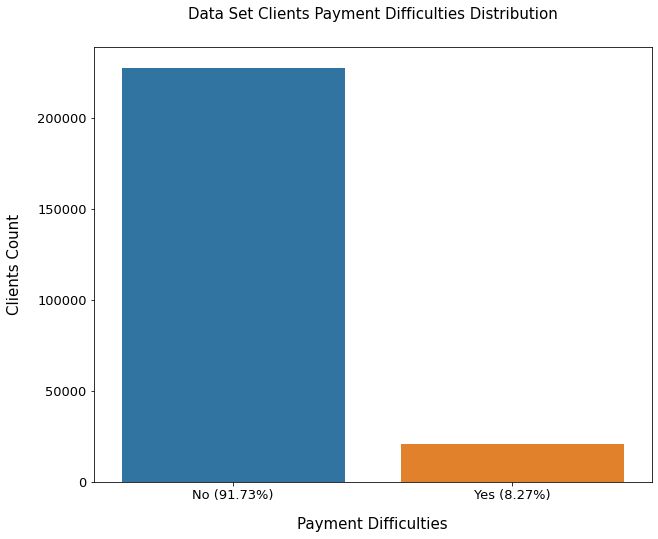

In [50]:
plt.figure(figsize = (10, 8))
sns.countplot(df_filtered2['TARGET'])

plt.xlabel('Payment Difficulties', size = 15, labelpad = 15)
plt.ylabel('Clients Count', size = 15, labelpad = 15)
plt.xticks((0, 1), ['No ({0:.2f}%)'.format(no_per), 'Yes ({0:.2f}%)'.format(yes_per)])
plt.tick_params(axis = 'x', labelsize = 13)
plt.tick_params(axis = 'y', labelsize = 13)

plt.title('Data Set Clients Payment Difficulties Distribution', size = 15, y = 1.05)
plt.show()

In [51]:
for col in cats2:
    x = df_filtered2.drop(col, 1)

In [52]:
x = x.drop("TARGET", 1)

In [54]:
y = df_filtered2[["TARGET"]]
y

,TARGET
1,0
2,0
3,0
4,0
5,0
...,...
307504,0
307505,0
307507,0
307509,1


In [55]:
# handling using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x, y)

In [56]:
y_smote.value_counts()

TARGET
0         227672
1         227672
dtype: int64

In [57]:
df_smote = x_smote.merge(y_smote, left_index=True, right_index=True)
df_smote

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,0.000000,0.286846,0.708980,0.491505,0.678873,0.070782,0.476287,0.043648,0.923745,0.959566,...,0,1,0,0,0,0,0,1,0,0
1,0.000000,0.049128,0.051108,0.069531,0.056338,0.212105,0.347505,0.046161,0.726098,0.648326,...,0,1,0,0,0,0,0,1,0,0
2,0.000000,0.128368,0.152007,0.403870,0.157746,0.168278,0.349819,0.038817,0.367775,0.661387,...,0,0,0,0,0,0,1,1,0,0
3,0.000000,0.112520,0.265760,0.289866,0.292958,0.617744,0.297482,0.038820,0.722819,0.519522,...,0,0,0,0,1,0,0,1,0,0
4,0.000000,0.086107,0.252981,0.372253,0.256338,0.772959,0.466350,0.042604,0.680448,0.933722,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455339,0.000000,0.088072,0.280789,0.506093,0.288613,0.109714,0.540688,0.044825,0.669966,0.512699,...,1,0,0,0,0,0,0,1,0,1
455340,0.000000,0.183847,0.361245,0.679420,0.348780,0.506752,0.632049,0.038804,0.882734,0.573682,...,0,0,0,1,0,0,0,1,0,1
455341,0.000000,0.165083,0.137371,0.231335,0.115972,0.280528,0.369667,0.036347,0.711166,0.817932,...,0,1,0,0,0,0,0,1,0,1
455342,0.000000,0.055417,0.227638,0.368343,0.250541,0.760869,0.754259,0.046127,0.764160,0.435917,...,0,0,0,0,0,1,0,1,0,1


# EDA

In [88]:
df1 = pd.read_csv("application_train.csv")
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
df2 = pd.read_csv('previous_application.csv')
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
dfmerge = df1.merge(df2, left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR', how = 'inner')
dfmerge

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER_x,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,CODE_GENDER_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,NaN
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,NaN
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0,NaN
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0,NaN
1413697,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1413698,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1413699,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0,NaN


In [98]:
dfvis = dfmerge[['CODE_GENDER_x', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'TARGET', 'NAME_CONTRACT_STATUS']]
dfvis.head()

,CODE_GENDER_x,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,TARGET,NAME_CONTRACT_STATUS
0,M,Single / not married,Secondary / secondary special,Working,1,Approved
1,F,Married,Higher education,State servant,0,Approved
2,F,Married,Higher education,State servant,0,Approved
3,F,Married,Higher education,State servant,0,Approved
4,M,Single / not married,Secondary / secondary special,Working,0,Approved


In [99]:
dfvis.shape

(1413701, 6)

In [101]:
dfvis['CODE_GENDER_x'].value_counts()

F      955139
M      458507
XNA        55
Name: CODE_GENDER_x, dtype: int64

In [102]:
dfvis['CODE_GENDER_x'] = dfvis['CODE_GENDER_x'].replace({'XNA':'F'})
dfvis['CODE_GENDER_x'].value_counts()

C:\Users\ACER\AppData\Local\Temp\ipykernel_22076\772901485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfvis['CODE_GENDER_x'] = dfvis['CODE_GENDER_x'].replace({'XNA':'F'})


F    955194
M    458507
Name: CODE_GENDER_x, dtype: int64

In [103]:
def get_dfpercent(column):
    listval = []
    listper = []
    for value in dfvis[column].unique():
        cat = dfvis[(dfvis[column]==value)]
        catyes = dfvis[(dfvis[column]==value) & (dfvis["TARGET"]==0) & (dfvis["NAME_CONTRACT_STATUS"]=="Approved")]
        cattotal = cat[column].value_counts()[0]
        yes_per = (catyes.shape[0]/cattotal)*100
        listval.append(value)
        listper.append(yes_per)
        #print('{:.1f}% {} clients had payment difficulties'.format(yes_per, value))
    dfpercent = pd.DataFrame(list(zip(listval,listper)),columns=[column,'Rate (%)'])
    return dfpercent

In [105]:
get_dfpercent("CODE_GENDER_x")

,CODE_GENDER_x,Rate (%)
0,M,56.716037
1,F,58.502147


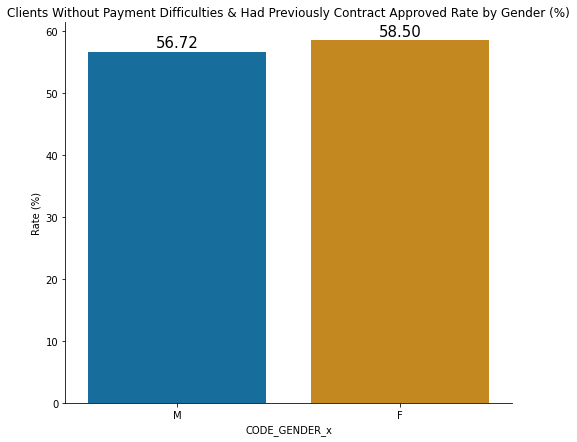

In [106]:
sns.set_palette("colorblind")
plt.figure(figsize=(8,7))
plots = sns.barplot(get_dfpercent("CODE_GENDER_x").iloc[:,0], get_dfpercent("CODE_GENDER_x").iloc[:,1])
plt.title("Clients Without Payment Difficulties & Had Previously Contract Approved Rate by Gender (%)")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
    (bar.get_x() + bar.get_width() / 2,
    bar.get_height()), ha='center', va='center', size=15, xytext=(0, 9),
    textcoords='offset points')
sns.despine()
plt.show()

In [107]:
get_dfpercent("NAME_INCOME_TYPE")

,NAME_INCOME_TYPE,Rate (%)
0,Working,57.331903
1,State servant,61.566974
2,Commercial associate,57.329049
3,Pensioner,58.940792
4,Unemployed,30.081301
5,Student,83.333333
6,Maternity leave,0.000000


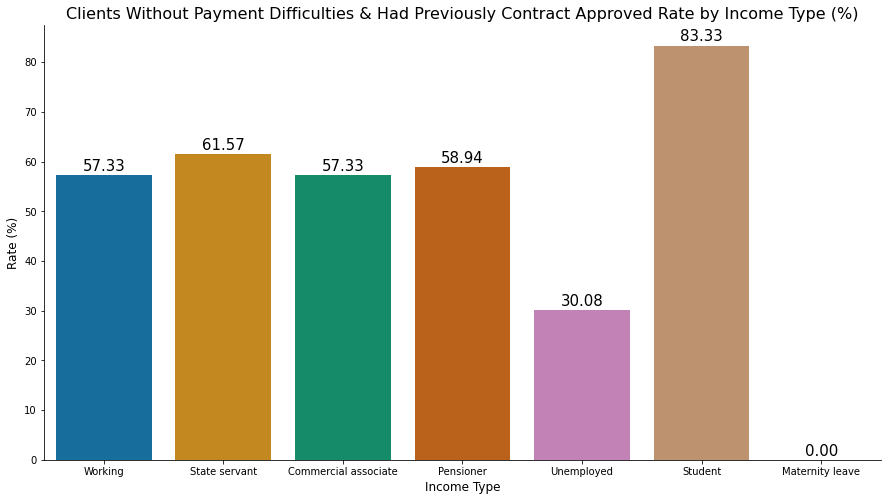

In [108]:
sns.set_palette("colorblind")
plt.figure(figsize=(15,8))
plots = sns.barplot(get_dfpercent("NAME_INCOME_TYPE").iloc[:,0], get_dfpercent("NAME_INCOME_TYPE").iloc[:,1])
plt.title("Clients Without Payment Difficulties & Had Previously Contract Approved Rate by Income Type (%)", fontsize=16)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
    (bar.get_x() + bar.get_width() / 2,
    bar.get_height()), ha='center', va='center', size=15, xytext=(0, 9),
    textcoords='offset points')
plt.ylabel("Rate (%)", fontsize=12)
plt.xlabel("Income Type", fontsize=12)
sns.despine()
plt.show()

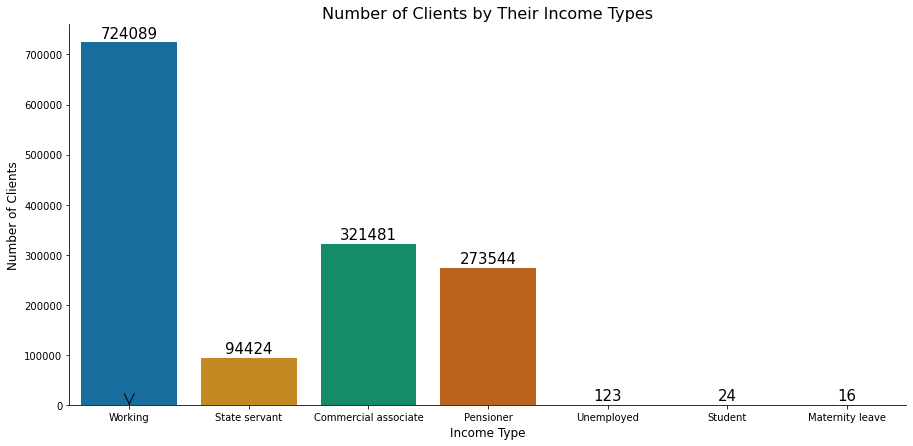

In [109]:
plt.figure(figsize=(15,7))
plots = sns.countplot(dfvis["NAME_INCOME_TYPE"])
plt.title("Number of Clients by Their Income Types", fontsize=16)
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
    (bar.get_x() + bar.get_width() / 2,
    bar.get_height()), ha='center', va='center', size=15, xytext=(0, 9),
    textcoords='offset points')
plt.ylabel("Number of Clients", fontsize=12)
plt.xlabel("Income Type", fontsize=12)
plt.annotate("", xytext=(0, 5), xy=(0, 1.5),
            arrowprops=dict(arrowstyle="->, head_length = 1, head_width = .5", lw=1))
sns.despine()
plt.show()

In [110]:
get_dfpercent("NAME_EDUCATION_TYPE")

,NAME_EDUCATION_TYPE,Rate (%)
0,Secondary / secondary special,57.637812
1,Higher education,59.073023
2,Incomplete higher,56.461923
3,Lower secondary,57.597297
4,Academic degree,71.157168


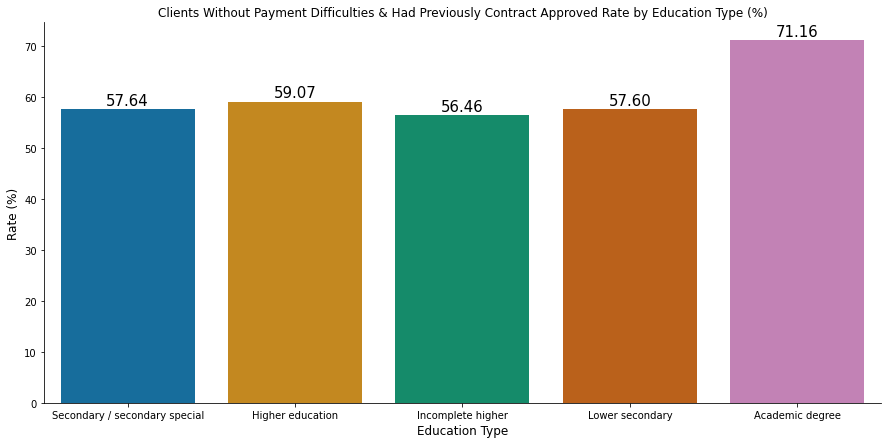

In [111]:
sns.set_palette("colorblind")
plt.figure(figsize=(15,7))
plots = sns.barplot(get_dfpercent("NAME_EDUCATION_TYPE").iloc[:,0], get_dfpercent("NAME_EDUCATION_TYPE").iloc[:,1])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
    (bar.get_x() + bar.get_width() / 2,
    bar.get_height()), ha='center', va='center', size=15, xytext=(0, 9),
    textcoords='offset points')
plt.title("Clients Without Payment Difficulties & Had Previously Contract Approved Rate by Education Type (%)")
plt.ylabel("Rate (%)", fontsize=12)
plt.xlabel("Education Type", fontsize=12)
sns.despine()
plt.show()

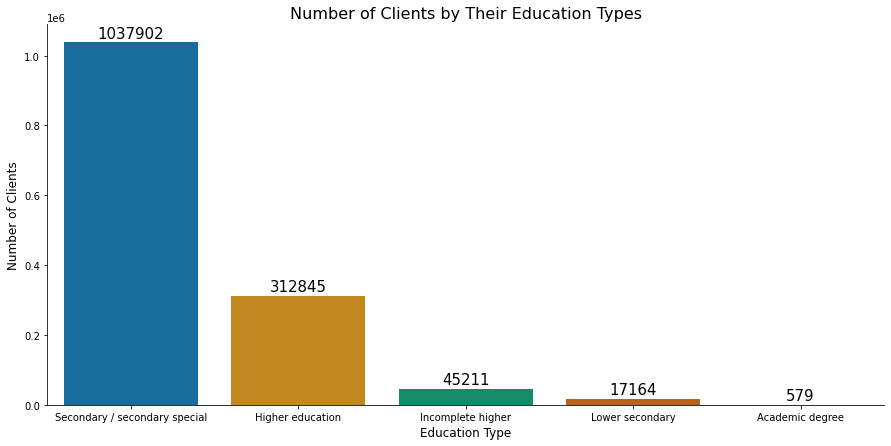

In [112]:
plt.figure(figsize=(15,7))
plots = sns.countplot(dfvis["NAME_EDUCATION_TYPE"])
plt.title("Number of Clients by Their Education Types", fontsize=16)
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
    (bar.get_x() + bar.get_width() / 2,
    bar.get_height()), ha='center', va='center', size=15, xytext=(0, 9),
    textcoords='offset points')
plt.ylabel("Number of Clients", fontsize=12)
plt.xlabel("Education Type", fontsize=12)
sns.despine()
plt.show()

In [113]:
get_dfpercent("NAME_FAMILY_STATUS")

,NAME_FAMILY_STATUS,Rate (%)
0,Single / not married,55.980756
1,Married,58.748175
2,Civil marriage,55.156926
3,Widow,58.494102
4,Separated,57.485384


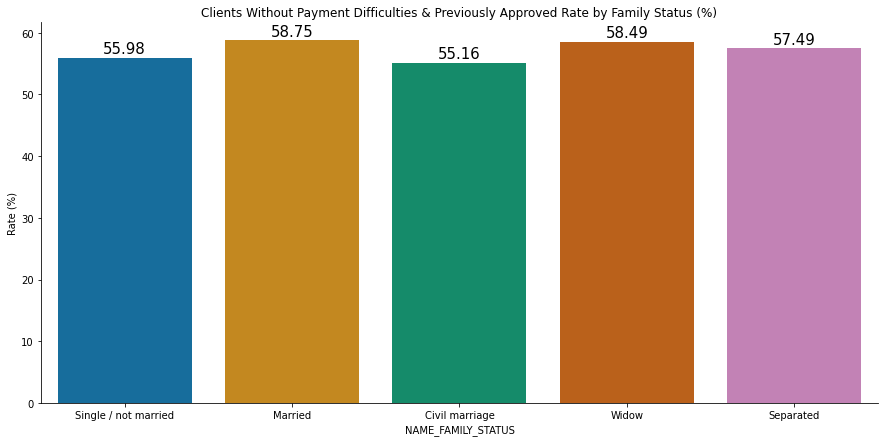

In [114]:
sns.set_palette("colorblind")
plt.figure(figsize=(15,7))
plots = sns.barplot(get_dfpercent("NAME_FAMILY_STATUS").iloc[:,0], get_dfpercent("NAME_FAMILY_STATUS").iloc[:,1])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
    (bar.get_x() + bar.get_width() / 2,
    bar.get_height()), ha='center', va='center', size=15, xytext=(0, 9),
    textcoords='offset points')
plt.title("Clients Without Payment Difficulties & Previously Approved Rate by Family Status (%)")
sns.despine()
plt.show()

# Heatmap

In [115]:
df_smote1 = df_smote.iloc[:,:44]
df_smote1 = df_smote1.merge(y_smote, left_index=True, right_index=True)
df_smote1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,TARGET
0,0.000000,0.286846,0.708980,0.491505,0.678873,0.070782,0.476287,0.043648,0.923745,0.959566,...,0.125000,0.0,0.125000,0.0,0.759512,0,1,0,0,0
1,0.000000,0.049128,0.051108,0.069531,0.056338,0.212105,0.347505,0.046161,0.726098,0.648326,...,0.000000,0.0,0.000000,0.0,0.763288,0,0,0,0,0
2,0.000000,0.128368,0.152007,0.403870,0.157746,0.168278,0.349819,0.038817,0.367775,0.661387,...,0.250000,0.0,0.250000,0.0,0.820796,0,1,0,0,0
3,0.000000,0.112520,0.265760,0.289866,0.292958,0.617744,0.297482,0.038820,0.722819,0.519522,...,0.000000,0.0,0.000000,0.0,0.678769,0,0,0,0,0
4,0.000000,0.086107,0.252981,0.372253,0.256338,0.772959,0.466350,0.042604,0.680448,0.933722,...,0.000000,0.0,0.000000,0.0,0.263433,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455339,0.000000,0.088072,0.280789,0.506093,0.288613,0.109714,0.540688,0.044825,0.669966,0.512699,...,0.078072,0.0,0.078072,0.0,0.732398,0,1,0,0,1
455340,0.000000,0.183847,0.361245,0.679420,0.348780,0.506752,0.632049,0.038804,0.882734,0.573682,...,0.084542,0.0,0.084542,0.0,0.740124,0,1,0,0,1
455341,0.000000,0.165083,0.137371,0.231335,0.115972,0.280528,0.369667,0.036347,0.711166,0.817932,...,0.000000,0.0,0.000000,0.0,0.841455,0,1,0,0,1
455342,0.000000,0.055417,0.227638,0.368343,0.250541,0.760869,0.754259,0.046127,0.764160,0.435917,...,0.005290,0.0,0.005290,0.0,0.782730,0,1,0,0,1


<AxesSubplot:>

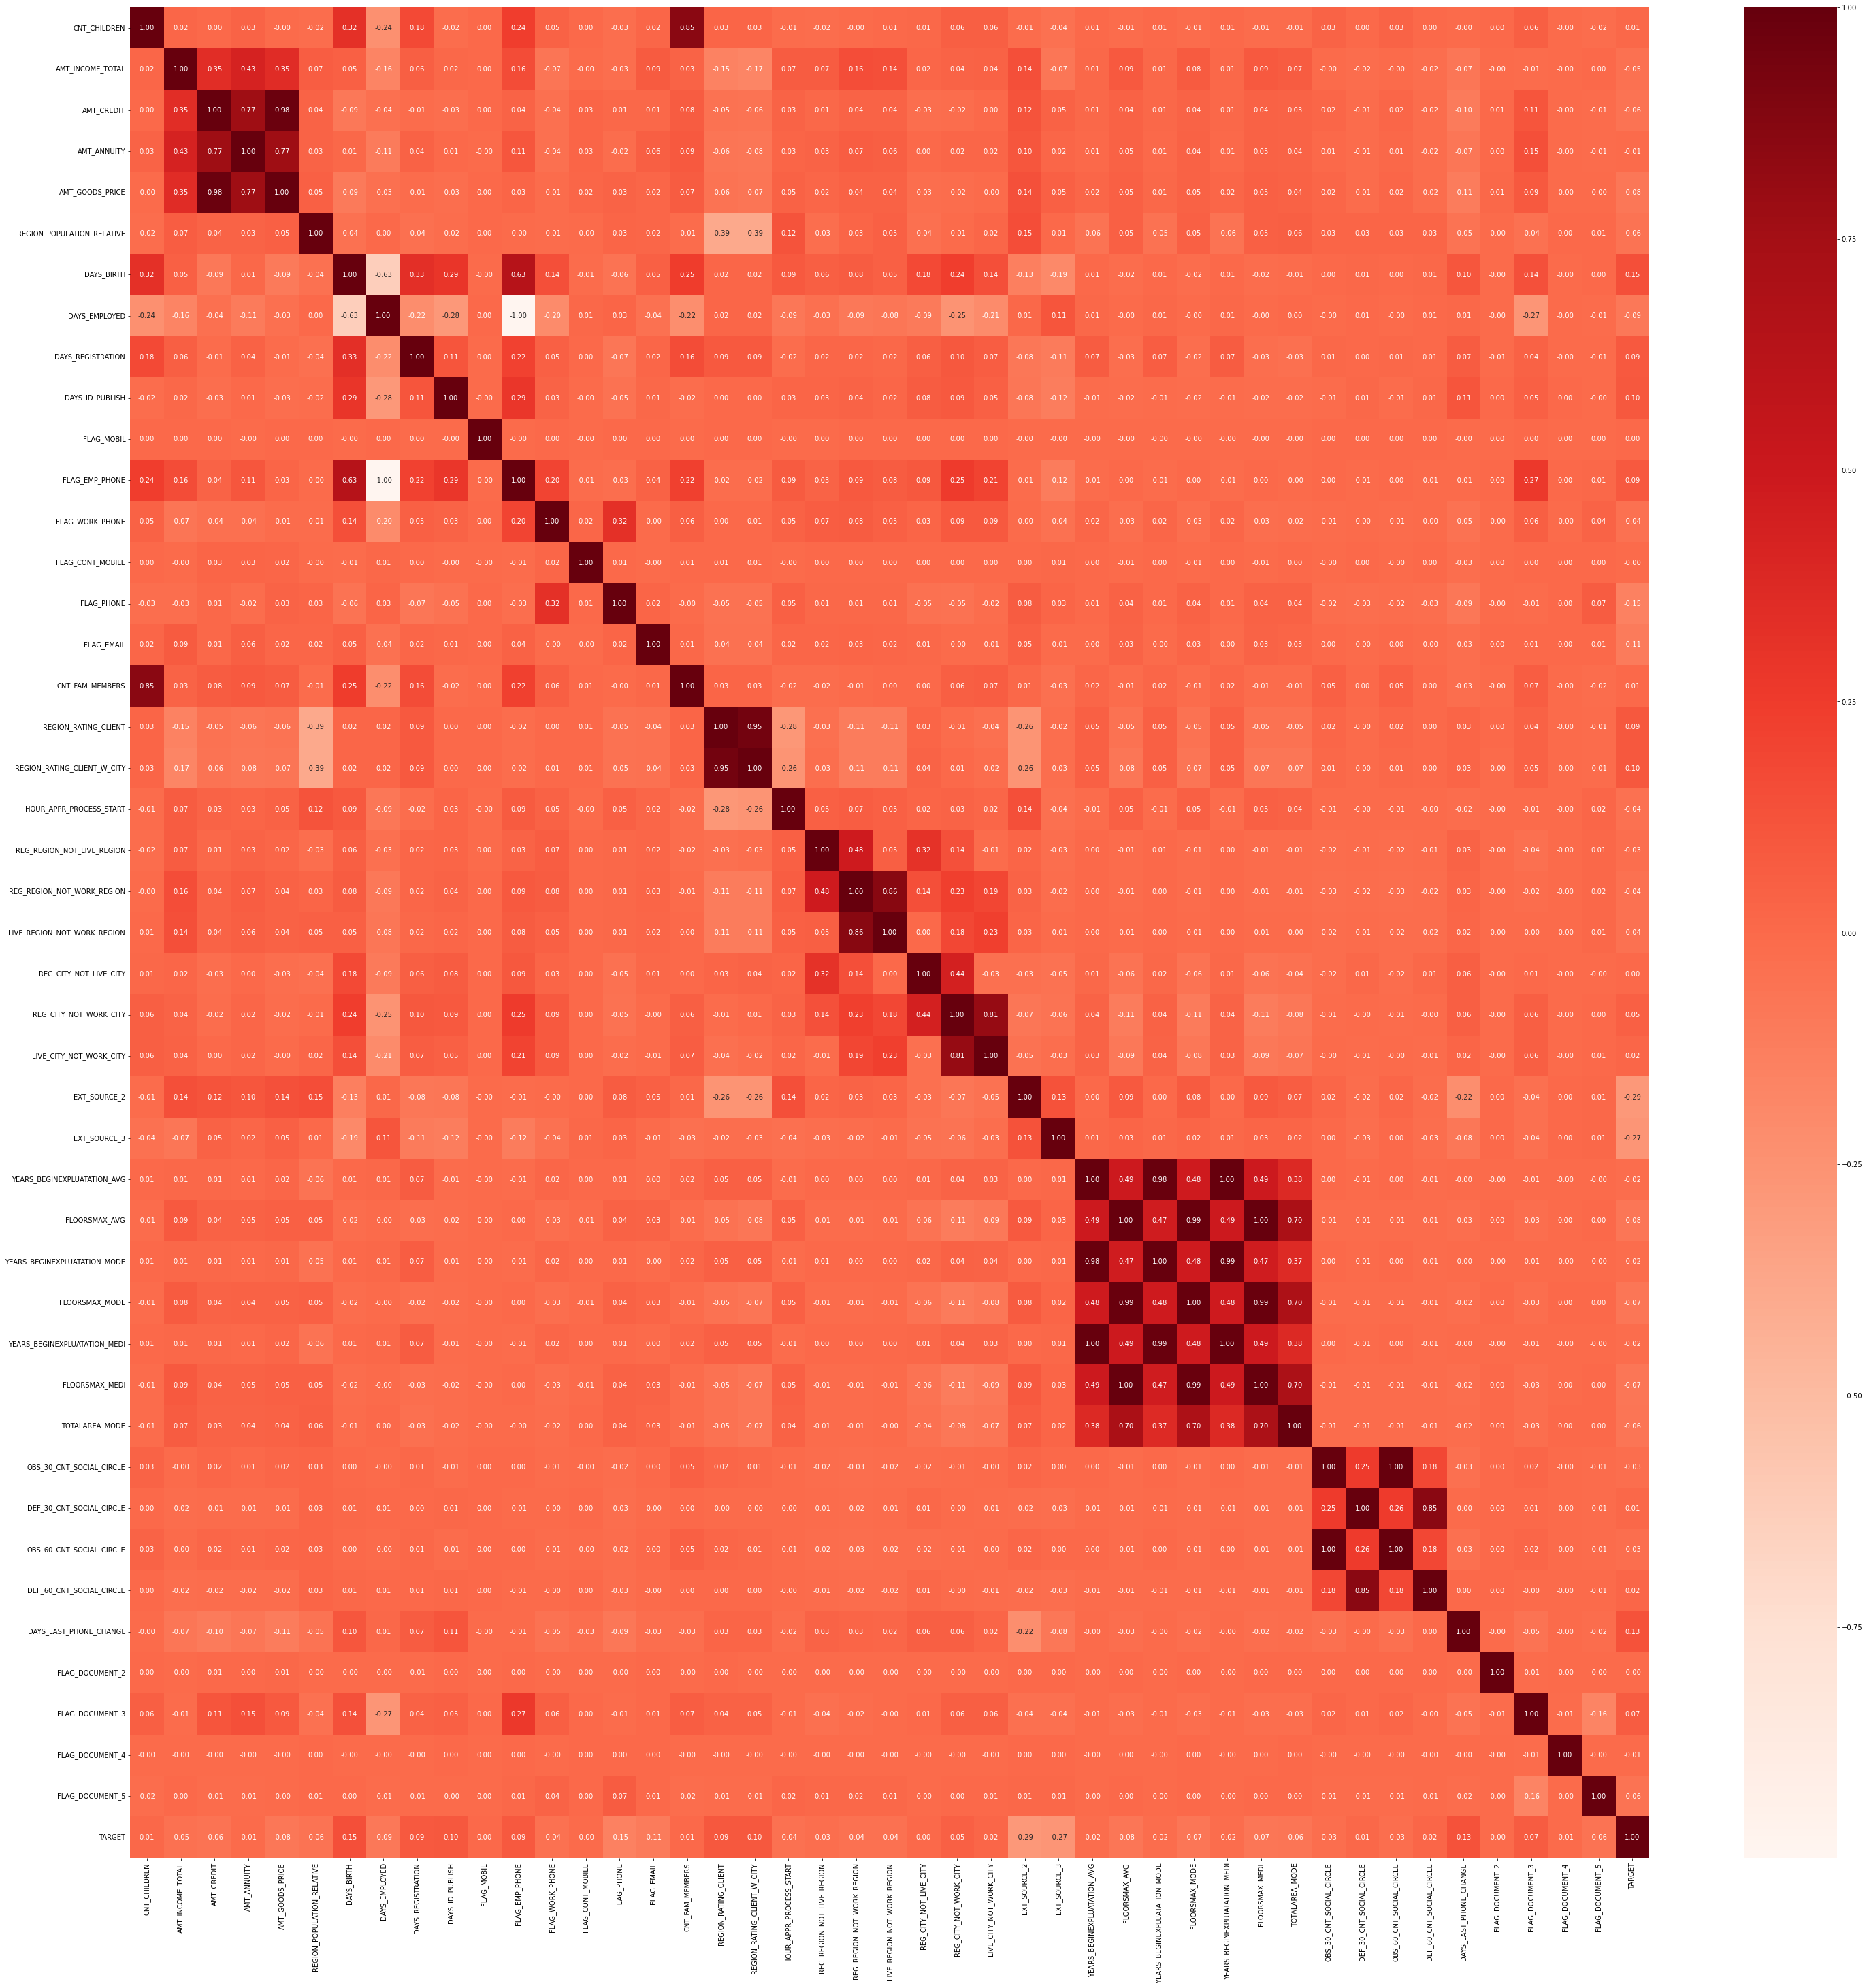

In [116]:
# corelation heatmap
plt.figure(figsize=(50,50))
sns.heatmap(df_smote1.corr(), cmap="Reds", annot=True, fmt=".2f")

In [117]:
df_smote2 = df_smote.iloc[:,44:88]
df_smote2 = df_smote2.merge(y_smote, left_index=True, right_index=True)
df_smote2

,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,...,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,TARGET
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455339,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
455340,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
455341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
455342,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


<AxesSubplot:>

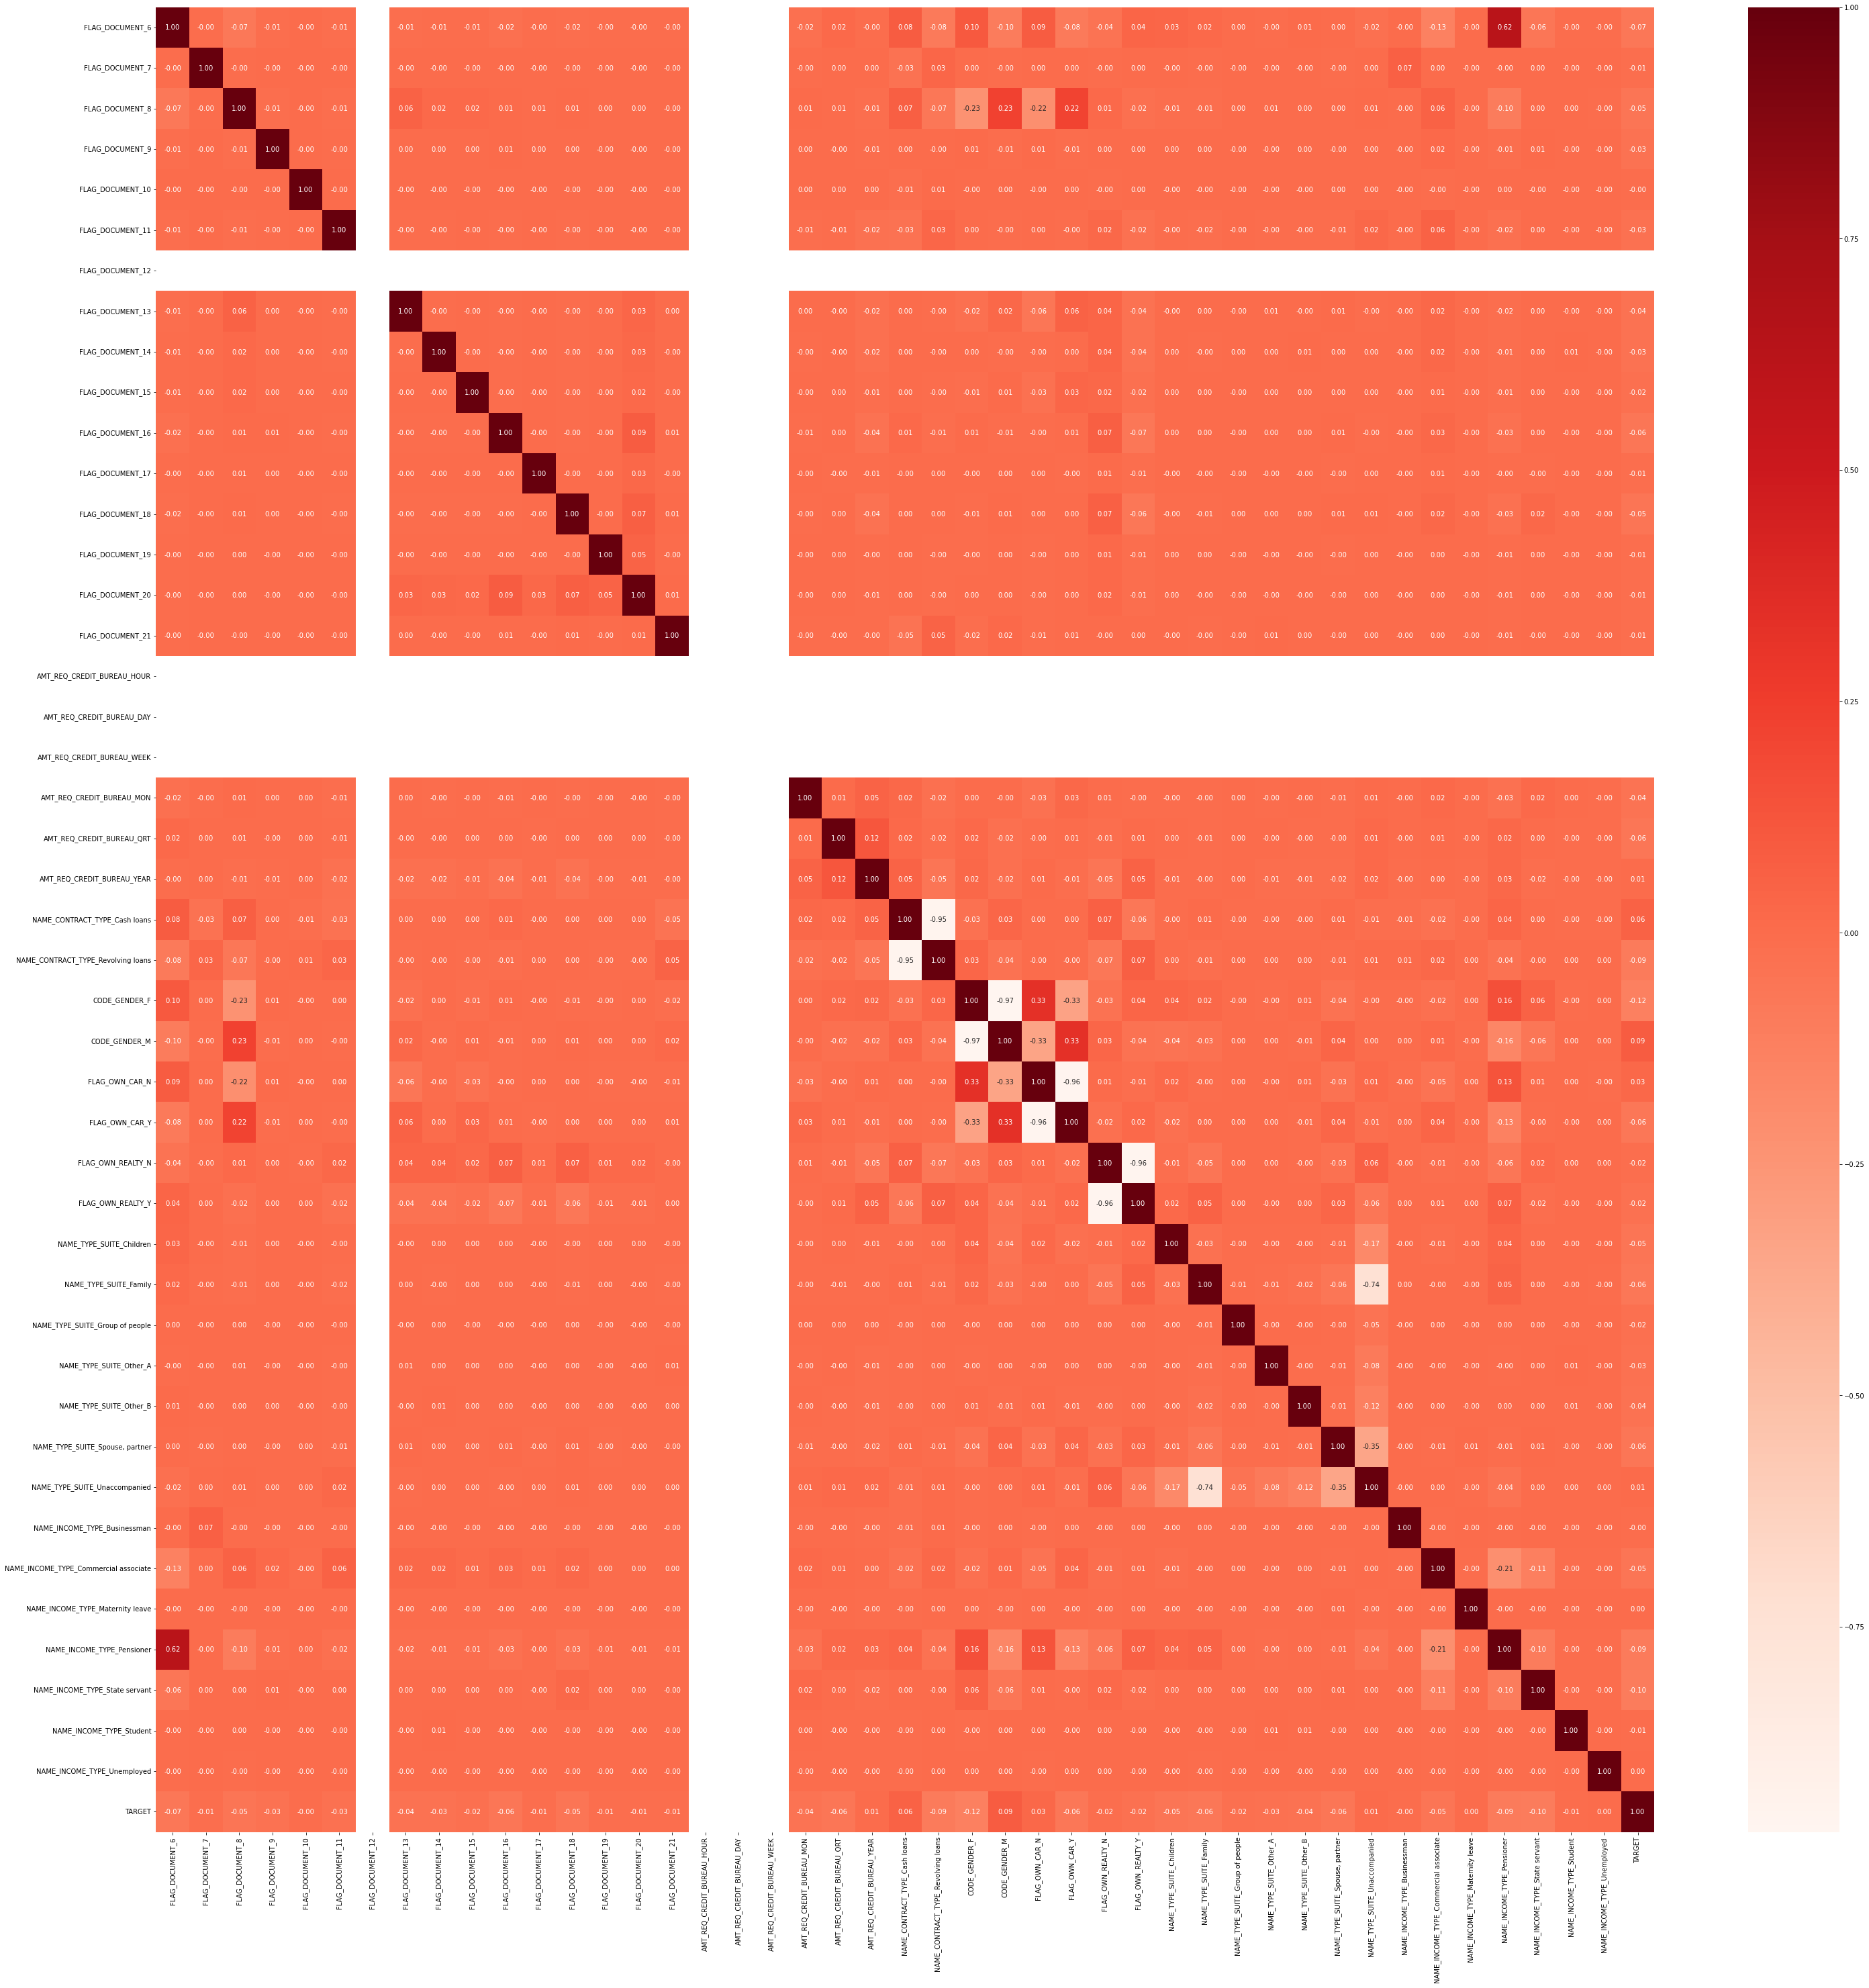

In [118]:
# corelation heatmap
plt.figure(figsize=(50,50))
sns.heatmap(df_smote2.corr(), cmap="Reds", annot=True, fmt=".2f")

In [119]:
df_smote3 = df_smote.iloc[:,88:133]
df_smote3

,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,...,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455339,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
455340,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
455341,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
455342,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1


<AxesSubplot:>

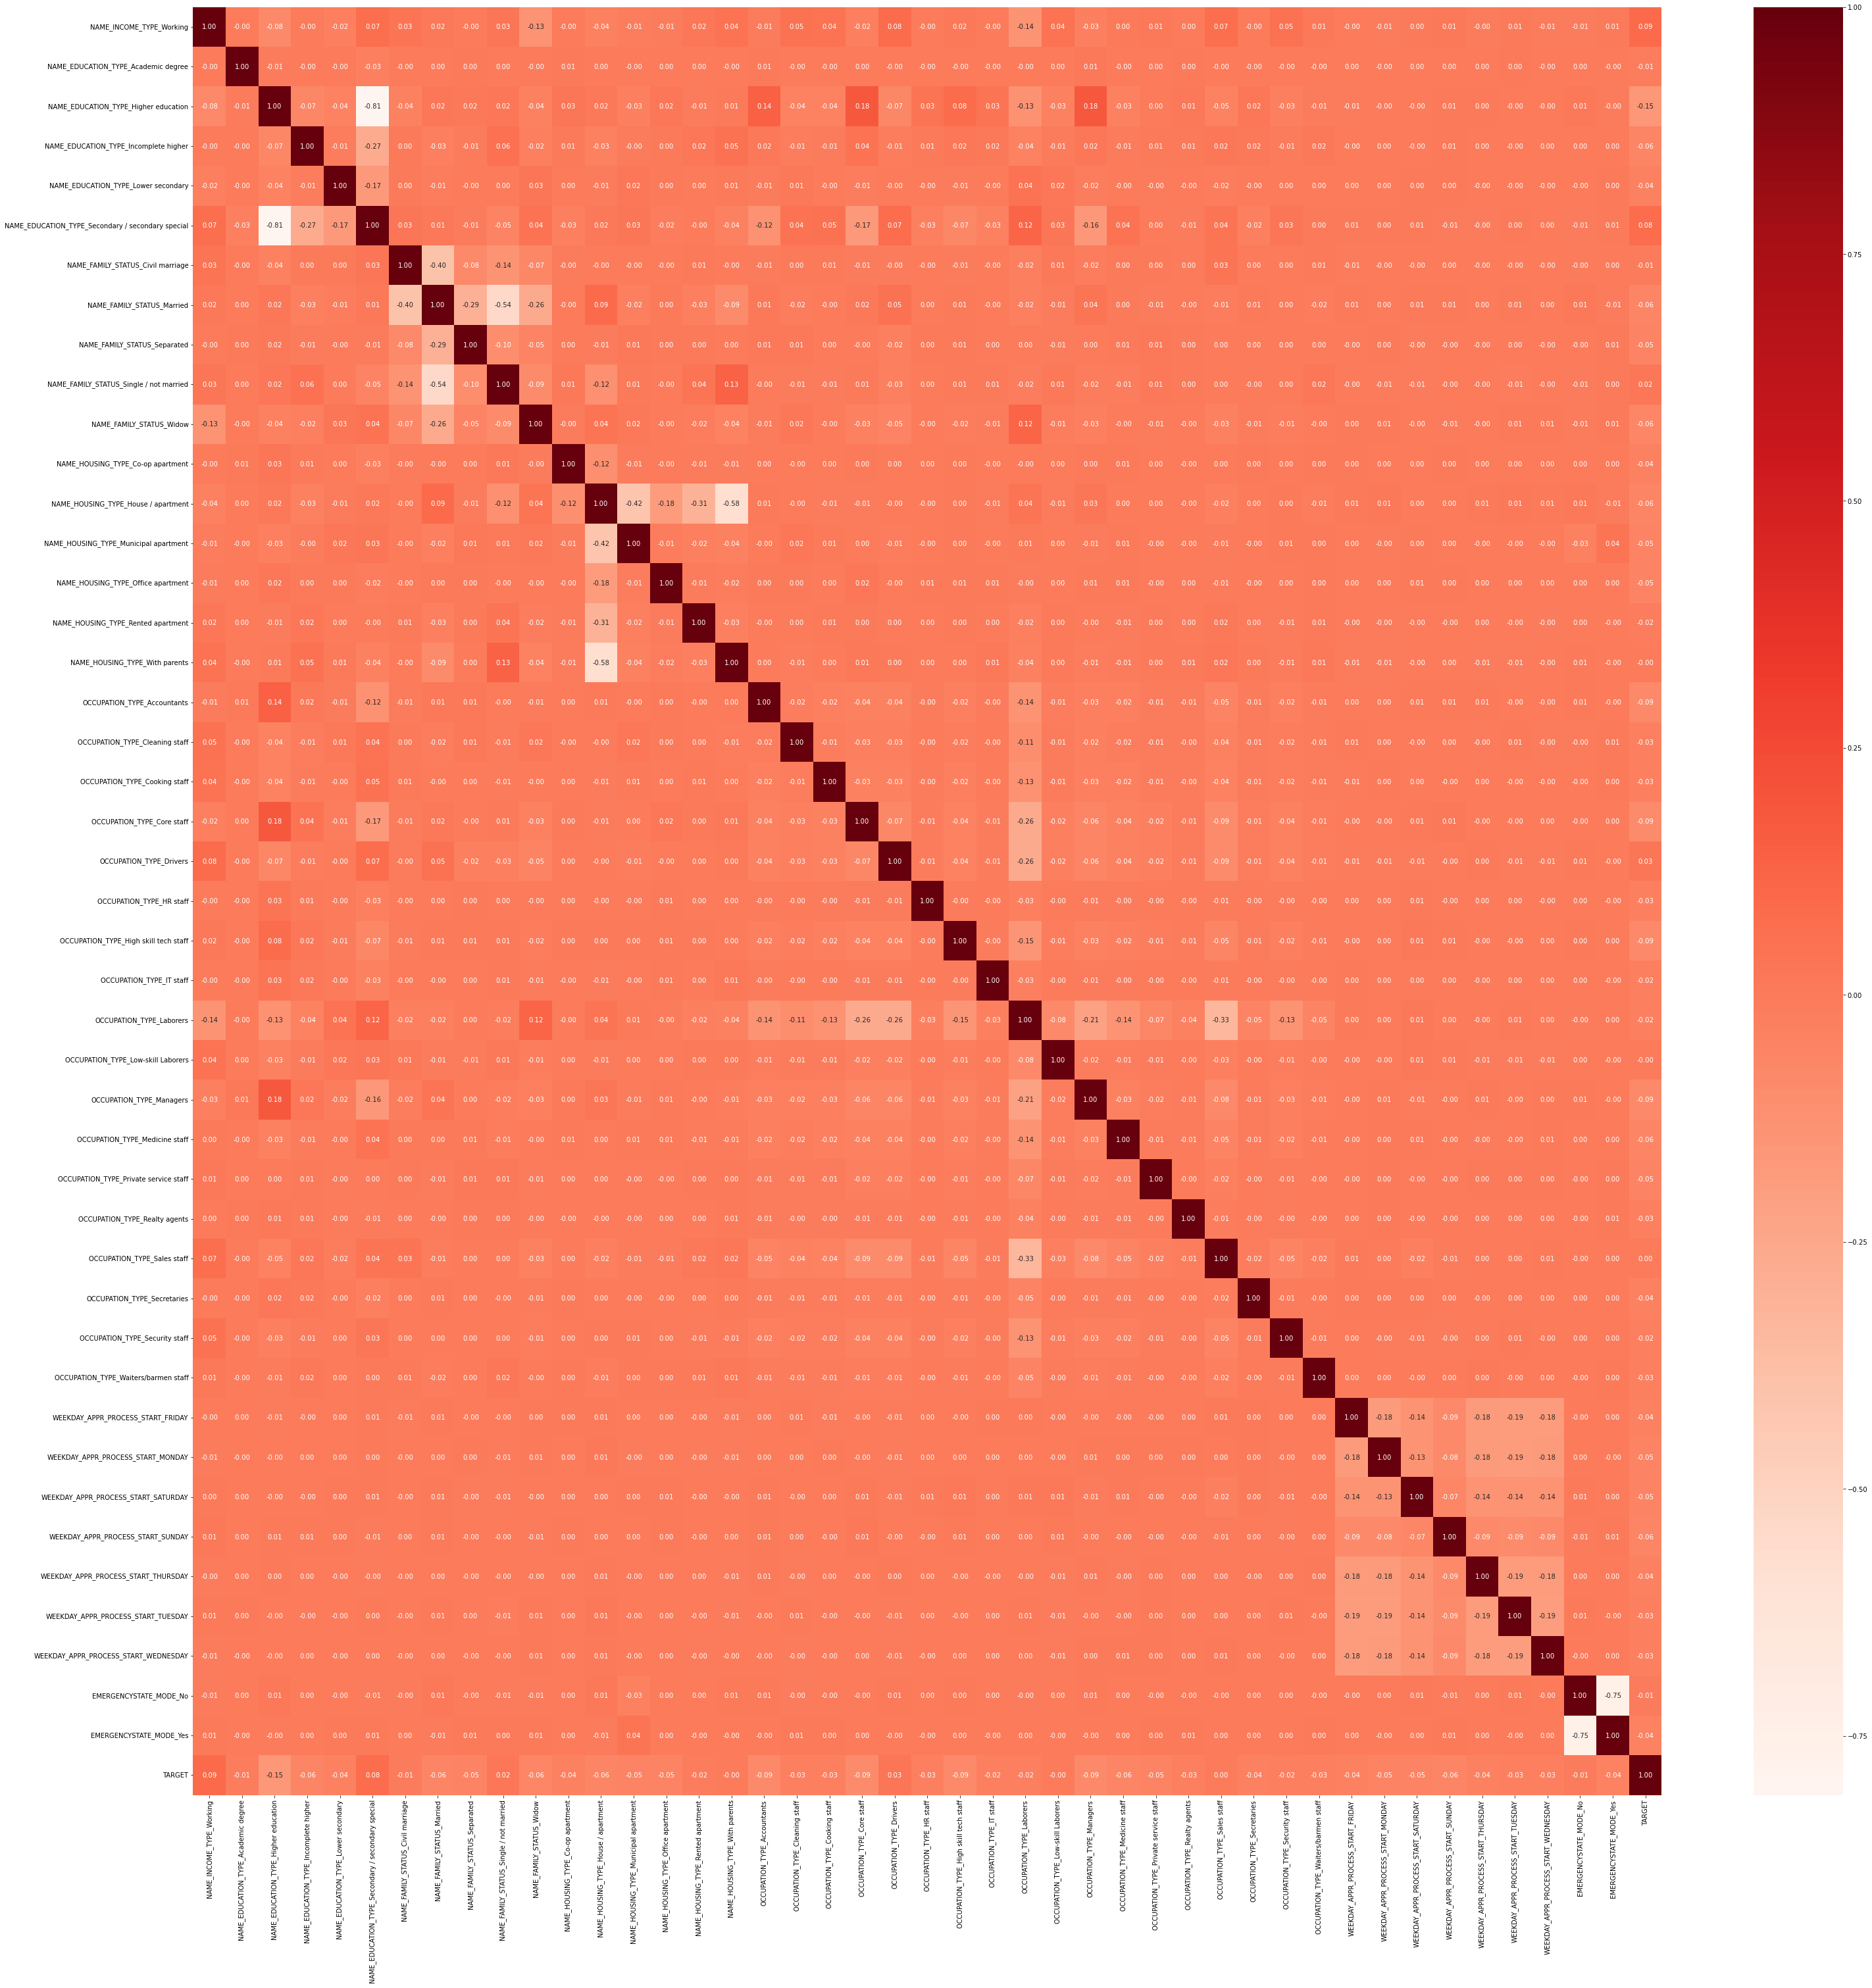

In [120]:
# corelation heatmap
plt.figure(figsize=(50,50))
sns.heatmap(df_smote3.corr(), cmap="Reds", annot=True, fmt=".2f")

# Modelling

In [121]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=12)

In [122]:
from  sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from  sklearn.metrics import roc_curve, auc

In [123]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x_smote.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

## Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(x_train, y_train)

lr_pred = model_lr.predict(x_test)

eval_classification(model_lr,lr_pred, x_train, y_train, x_test, y_test)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy (Test Set): 0.8604
Precision (Test Set): 0.9051
Recall (Test Set): 0.8047
F1-Score (Test Set): 0.8520
AUC: 0.86


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
# Cek overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_lr.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model_lr.score(x_test, y_test)))

Training set score: 0.8601
Test set score: 0.8604


## Random Forest

In [126]:
# Bagging (random forest)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
eval_classification(rf, y_pred, x_train, y_train, x_test, y_test)

C:\Users\ACER\AppData\Local\Temp\ipykernel_22076\3573847502.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


Accuracy (Test Set): 0.9515
Precision (Test Set): 0.9864
Recall (Test Set): 0.9155
F1-Score (Test Set): 0.9496
AUC: 0.95


In [127]:
#check overfitting
print('Training set score: {:.4f}'.format(rf.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(rf.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9515


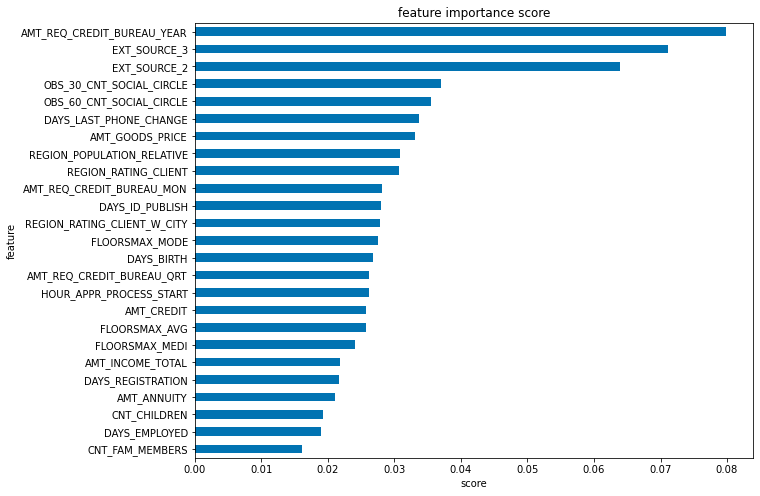

In [128]:
show_feature_importance(rf)

## XGBoost

In [129]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=50)
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
eval_classification(xg, y_pred, x_train, y_train, x_test, y_test)

C:\Users\ACER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22:11:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.9540
Precision (Test Set): 0.9953
Recall (Test Set): 0.9121
F1-Score (Test Set): 0.9519
AUC: 0.95


In [130]:
#overfitting
print('Training set score: {:.4f}'.format(xg.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(xg.score(x_test, y_test)))

Training set score: 0.9559
Test set score: 0.9540


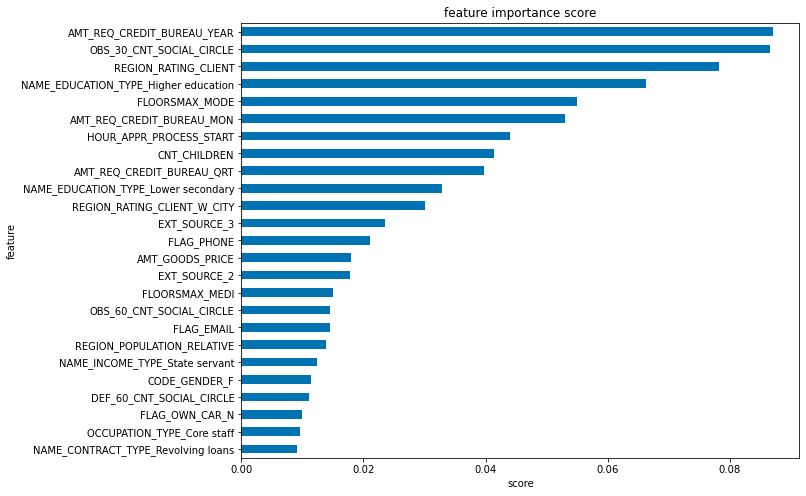

In [131]:
show_feature_importance(xg)

# Evaluation

In [135]:
dfeval = pd.DataFrame({'Model':['Logistic Regression', 'Random Forest', 'XGBoost'],
                       'Accuracy' : [0.8604, 0.9515, 0.9540],
                       'Precision' : [0.9051, 0.9864, 0.9953],
                         'Recall' : [0.8047, 0.9155, 0.9121],
                         'AUC' : [0.86, 0.95, 0.95]},)
dfeval

,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.8604,0.9051,0.8047,0.86
1,Random Forest,0.9515,0.9864,0.9155,0.95
2,XGBoost,0.9540,0.9953,0.9121,0.95


In [136]:
dfoverfit = pd.DataFrame({'Model':['Logistic Regression', 'Random Forest', 'XGBoost'],
                         'Training Score' : [0.8601, 1.0000, 0.9559],
                         'Test Score' : [0.8604, 0.9515, 0.9540]})
dfoverfit 

,Model,Training Score,Test Score
0,Logistic Regression,0.8601,0.8604
1,Random Forest,1.0000,0.9515
2,XGBoost,0.9559,0.9540
